In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("adult.data",header=None)
data = [df]
print (df.head())

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [3]:
df.rename(columns={0: 'age', 
                   1: 'workclass',
                   2: 'weight',
                   3: 'education',
                   4: 'education-years',
                   5: 'marital-status',
                   6: 'occupation',
                   7: 'relationship',
                   8: 'race',
                   9: 'sex',
                   10: 'capital-gain',
                   11: 'capital-loss',
                   12: 'hours-per-week',
                   13: 'country',
                   14: 'salary',}, inplace=True)

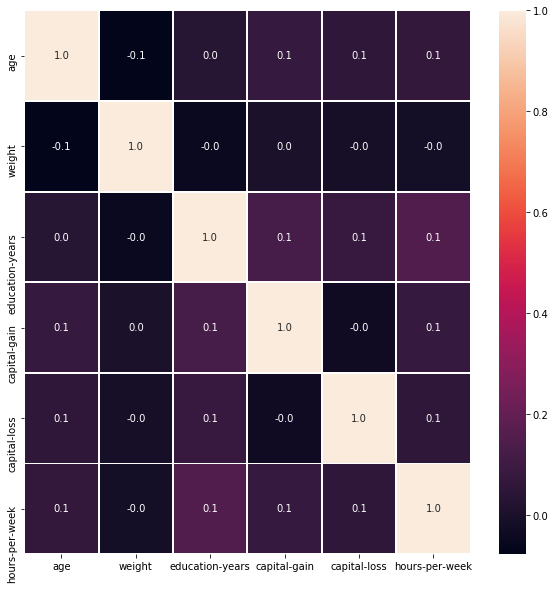

In [4]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)

In [5]:
#Transform categorical data into numbers

#convert salary
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)

#convert sex
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

#replace ?
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df.dropna(how='any',inplace=True)

#convert country
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)

#convert marital-status
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
df.head(10)

#convert relationship
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}
df['relationship'] = df['relationship'].map(rel_map)

#convert race
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
df['race']= df['race'].map(race_map)

#convert workclass
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
#add new column employment_type   
df['employment_type']=df.apply(f, axis=1)
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}
df['employment_type'] = df['employment_type'].map(employment_map)

#drop unneeded labels
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)

#convert capital-gain
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

#convert capital-loss
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

In [6]:
print (df.head(10))
print (("-"*40))
print (df.info())

   age  weight  education-years  marital-status  relationship  race  sex  \
0   39   77516               13               1             3     0    1   
1   50   83311               13               0             2     0    1   
2   38  215646                9               1             3     0    1   
3   53  234721                7               0             2     3    1   
4   28  338409               13               0             1     3    0   
5   37  284582               14               0             1     0    0   
6   49  160187                5               1             3     3    0   
7   52  209642                9               0             2     0    1   
8   31   45781               14               1             3     0    0   
9   42  159449               13               0             2     0    1   

   capital-gain  capital-loss  hours-per-week  country  salary  \
0             1             0              40        1       1   
1             0             0  

In [7]:
X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

# 70 / 30 Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=split_size,random_state=22)

# 80 / 20 Train / Validation Split
(X_train, X_val, y_train, y_val) = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

#SPLIT ALLOCATION
print("Split Allocation ---------------------")
print("training: {}".format(len(y_train)))
print("validation: {}".format(len(y_val)))
print("testing: {}".format(len(y_test)))

Split Allocation ---------------------
training: 16890
validation: 4223
testing: 9049


In [8]:
depth_val = range(1, 20)
forest_accuracies = []
    # loop over various values of d
for k in range(1, 20):
    # train the random forest Classifier with depth
    model = RandomForestClassifier(n_estimators=100,max_depth=k)
    model.fit(X_train, y_train)
 
    # evaluation of model
    score = model.score(X_val, y_val)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    forest_accuracies.append(score)
 
# highest accuracy
i = int(np.argmax(forest_accuracies))
print("d=%d achieved highest accuracy of %.2f%% on validation data" % (depth_val[i],
forest_accuracies[i] * 100))



d=13 achieved highest accuracy of 83.54% on validation data


In [9]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=depth_val[i])

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_test,y_test)
random_forest_predictions=clf.predict(X_test)

In [10]:
# report
from sklearn import metrics
from sklearn.metrics import classification_report

print("Random Forest Score")
print(classification_report(y_test, random_forest_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, random_forest_predictions))


Random Forest Score
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2243
           1       0.91      0.97      0.94      6806

   micro avg       0.90      0.90      0.90      9049
   macro avg       0.89      0.83      0.86      9049
weighted avg       0.90      0.90      0.90      9049

Accuracy: 0.9014255718863963


## SVM

In [11]:
from sklearn.svm import SVC  

cost_val = range(1, 5)
gamma_val = range(1, 5)
svc_accuracies = []
    # loop over various values of d
    
for k in range(1, 5):
    # train the random forest Classifier with depth
    model = SVC(C=2,kernel='rbf',gamma=1) 
    model.fit(X_train, y_train) 
 
    # evaluation of model
    score = model.score(X_val, y_val)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    svc_accuracies.append(score)
 
# highest accuracy
#i = int(np.argmax(svc_accuracies))
#print("g=%d achieved highest accuracy of %.2f%% on validation data" % (gamma_val[i],
#svc_accuracies[i] * 100))


In [12]:
#Create a Gaussian Classifier
clf=SVC(C=2,kernel='rbf',gamma=1) 

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_test,y_test)
SVC_predictions=clf.predict(X_test)

In [13]:
print("Support Vector Machine")
print(classification_report(y_test, SVC_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, SVC_predictions))

Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2243
           1       1.00      1.00      1.00      6806

   micro avg       1.00      1.00      1.00      9049
   macro avg       1.00      1.00      1.00      9049
weighted avg       1.00      1.00      1.00      9049

Accuracy: 0.9996684716543265
